## Práctica 2: Procesamiento de datatasets

#### Resumen 
Se selecciono un conjunto de datos relacionado con el desempeño de estudiantes en el examen final, el conjunto de datos tiene variables como horas de estudio, horas de sueño, actividades extracurriculares, participación de los padres, género de los estudiantes, puntuación final del examen, entre otros. Se realizo un analisis exploratorio para cada variable de manera univariada y vibariada posteriormente se construyo una variable extra con la clasificación de acuerdo al puntaje de examen final (bajo menor a 70, medio mayor a 70 y menor o igual 80 y alto mayor a 80). Sin embargo, no se identificaban una tendencia clara en las variables que podrian estar influyendo en la puntuación final de los estudiantes. Posteriormente se aplicarón tecnicas de reducción de dimensionalidad (PCA, T-SNE, LDA y UMAP) de los métodos anteriores las que tuvierón mejor desempeño fuerón LDA y UMAP. Sin embargo, tienen desempeño deficiente para identificar a la clase con menos registros por ultimo se aplicaron métodos de selección de variables y las que resultaron con puntaje predominante fuerón la asistencia a clases, la puntuación en examenes previos y el número de horas de estudio. A su vez las demas variables no resultarón con puntuaciones suficientes para ser consideradas como influyentes en la puntuación final de los estudiantes. Por ultimo se conluye que estos resultados son utiles para establecer iniciativas que ayuden a mejorar el desempeño de los estudiantes de manera dirigida y basada en evidencias.

### La segunda práctica consiste en seleccionar un Dataset de interés (se puede elegir el dataset de la práctica 1), y aplicar al menos tres técnicas de los siguientes tipos de procesamiento:

    Limpieza de datos
    Aumento de datos
    Extracción de características
    Reducción de dimensionalidad
    Selección de características

Por ejemplo, eliminación de datos incompletos (limpieza de datos), PCA (reducción de dimensionalidad), y ganancia de información (selección de atributos). Sobra decir que se requiere realizar un análisis exploratorio de los datos.

## Selección del conjunto de datos 

# Factores que influyen en el desempeño de los estudiantes

### Descripción

#### Este conjunto de datos ofrece una visión global de diversos factores que afectan al rendimiento de los estudiantes en los exámenes. Incluye información sobre hábitos de estudio, asistencia, participación de los padres y otros aspectos que influyen en el éxito académico.

 Atributos
 
 Hours_Studied: 	Número de horas de estudio por semana.
 
 Attendance: 	Porcentaje de asistencia.
 
 Parental_Involvement: 	Nivel de participación de los padres en la educación de sus hijos (Low, Medium, High).
 
 Access_to_Resources: 	Disponibilidad de recursos educativos (Low, Medium, High).
 
 Extracurricular_Activities: 	Particiáción en actividades extracurriculares (Yes, No).
 
 Sleep_Hours: 	Número de horas promedio por noche.
 
 Previous_Scores: 	Puntuación de examenes anteriores.
 
 Motivation_Level: 	Nivel de motivación de los estudiantes (Low, Medium, High).
 
 Internet_Access: 	Disponibilidad de acceso a internet (Yes, No).
 
 Tutoring_Sessions: 	Número de sesiones de tutoria que asiste al mes.
 
 Family_Income: 	Nivel de ingreso económico familiar (Low, Medium, High).
 
 Teacher_Quality: 	Calidad de los profesores (Low, Medium, High).
 
 School_Type: 	Tipo de escuela  (Public, Private).
 
 Peer_Influence: 	Influencia de compañeros en desemepeño académico (Positive, Neutral, Negative).
 
 Physical_Activity: 	Número de horas promedio de actividad física a la semana.
 
 Learning_Disabilities: 	Presencia de dificultades de aprendizaje. (Yes, No).
 
 Parental_Education_Level: 	Nivel de educación alcanzado por los padres (High School, College, Postgraduate).
 
 Distance_from_Home: 	Distancia de la casa a la escuela. (Near, Moderate, Far).
 
 Gender: 	Género del estudiante (Male, Female).
 
 Exam_Score: 	Puntuación final de examen.


##### Dirección original del conjunto de datos: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download

## Cargamos el conjunto de datos y cargamos las librerias

In [1]:
## cargar las librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
## leer el conjunto de datos
url = 'https://raw.githubusercontent.com/hamlel/Introduccion-ciencia-de-datos/refs/heads/main/Clases/Datos/StudentPerformanceFactors.csv'
df = pd.read_csv(url)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Limpieza de datos

Calculamos los valores perdidos NA y se identifica que las variables de Teacher Quality, Prental Education Level, y Distance from Home presentan valores perdidos.

In [3]:
df.isnull().sum()# calculamos los valores perdidos

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df = df.dropna()# eliminamos los valores perdidos para no presentar errores en el analisis
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [5]:
df.info() # en este apartado se identifican los tipos de datos del conjunto de datos. 

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

Se presentan las estadísticas descriptivas de las variables númericas, podemos identificar que el tiempo de horas promedio es de 7 horas y que el promedio de puntuación en el examen es de 67 puntos sobre 100.

In [6]:

df.describe().T# estadísticas descriptivas de las variables númericas


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


### Gráficos exploratorios

En este apartado podemos identificar que la variable de puntuación del examen presenta una distribución normal tambien es posible identificar que la mayoria de las puntuaciones de los estudiantes son menores a 80 sobre 100.

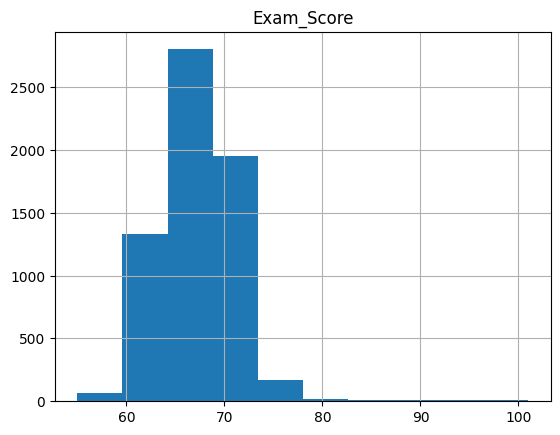

In [7]:
df[['Exam_Score']].hist();

 En los gráficos exploratorios se identifican que la participación de los padres, el acceso a recursos educativos, nivel de motivación, calidad de profesores predomina la categoria de medio de entre bajo, medio y alto. A su vez, la mayoria de los estudiantes: toman cursos extracurriculares, tienen acceso a internet, el ingreso de la mayoria de los padres es medio y alto, la mayoria de escuelas son públicas. Las puntuaciones en influencia de compañeros frente al desempeño academico es positiva y neutral, a su vez no presentan discapacidades de aprendizaje, la mayoria de los padres tienen nivel educativo de pregrado. Por ultimo, la mayoria de los estudiantes viven cerca de la escuela y se presenta una diferencia entre el número de estudiantes hombres y mujeres. 

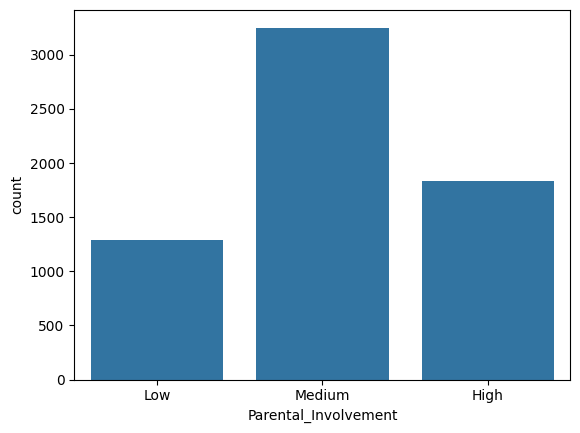

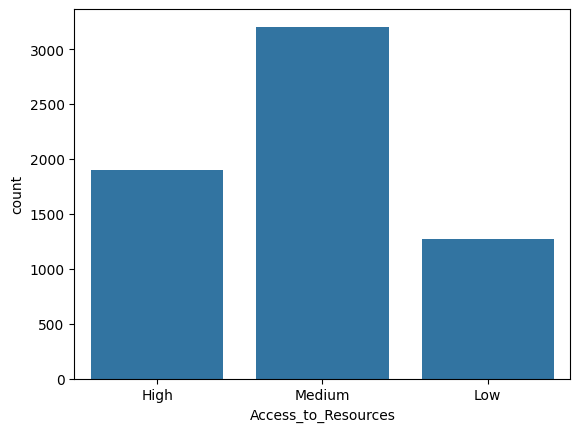

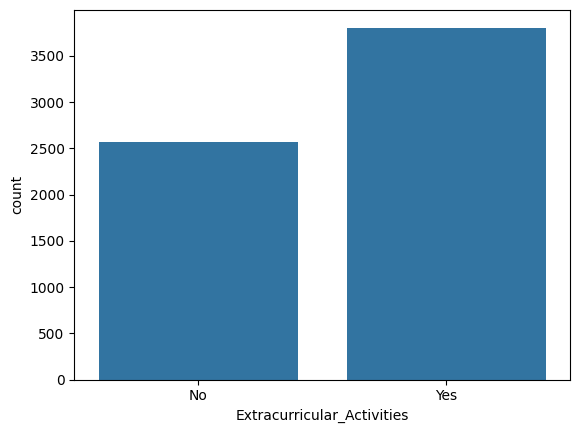

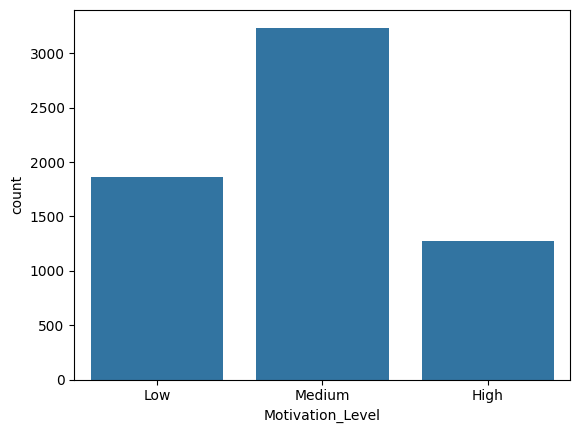

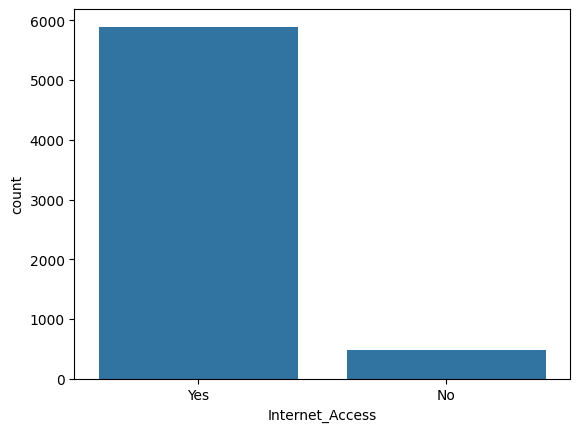

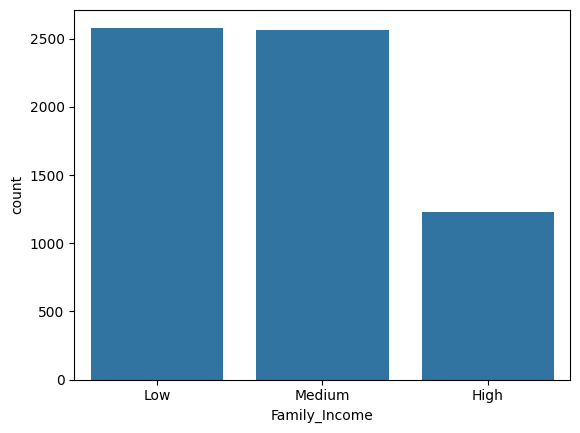

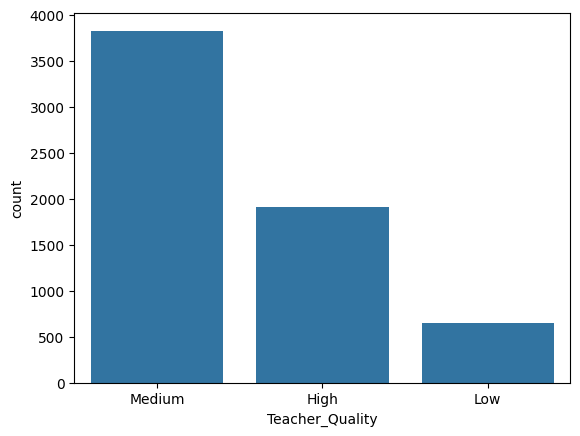

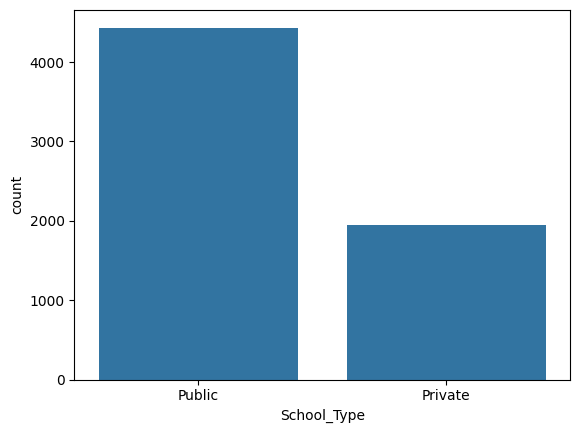

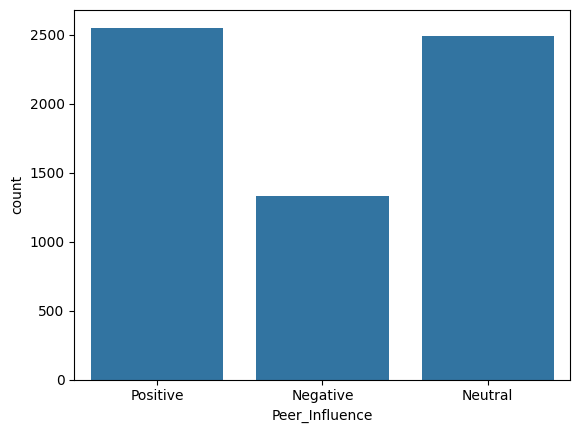

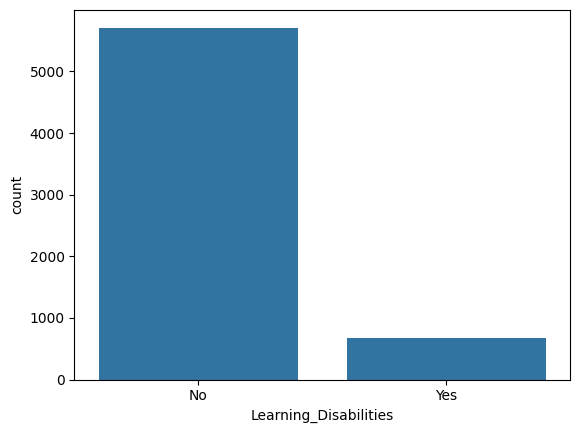

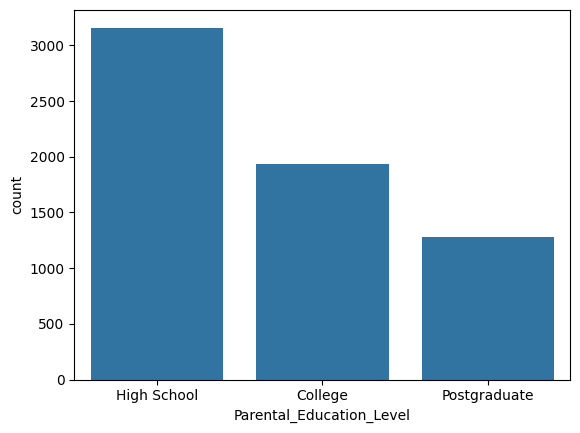

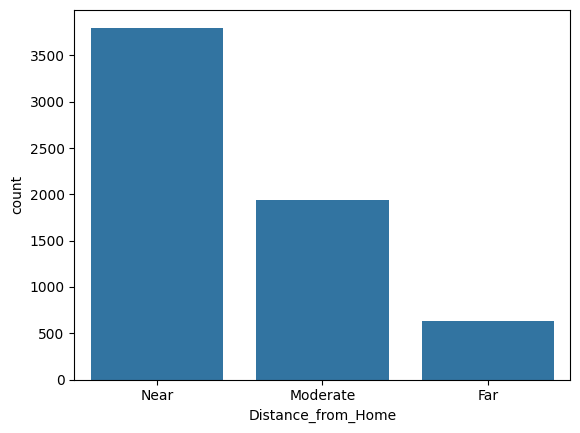

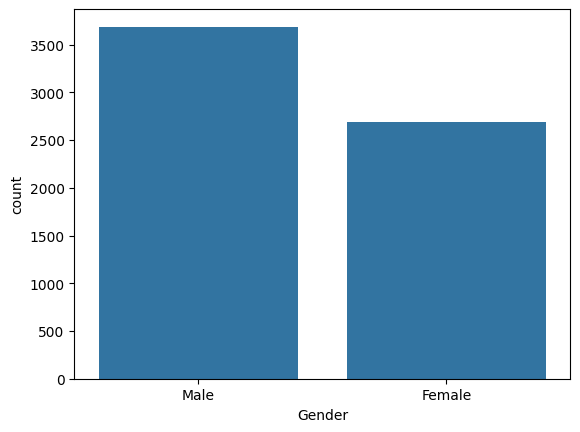

In [8]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

### En este apartado se realizan comparaciones bivariadas entre el desempeño del examen y diferentes variables, para el primer gráfico se comparan la distancia a la escuela de los estudiantes y la asistencia a clases. Sin embargo, a traves de los boxplots se identifica que no se presentan diferencias entre dichas variables. 

<Axes: xlabel='Distance_from_Home', ylabel='Attendance'>

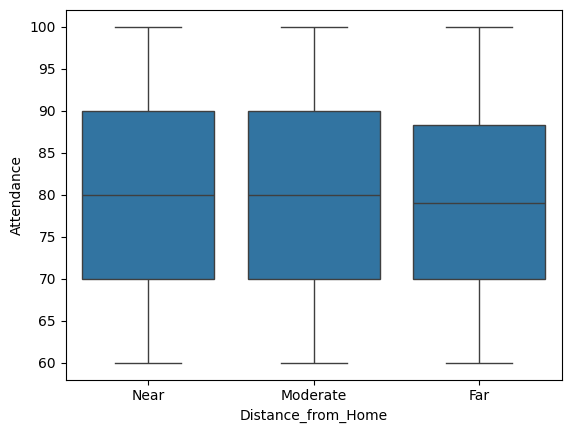

In [9]:
sns.boxplot(x="Distance_from_Home",y="Attendance", data=df)

 En el siguiente gŕafico se presenta el comportamiento de las variables de horas de estudio y desempeño del examen final. En este grafico se puede identificar que de manera general se presenta una tendencia a mayor número de horas un mayor puntaje en el examen. Sin embargo, hay casos en donde se obtuvierón mejores resultados con un menor número de horas de estudio. 

<Figure size 800x800 with 0 Axes>

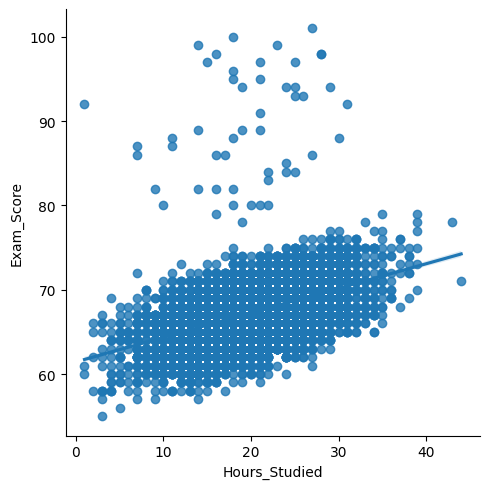

In [10]:
plt.figure(figsize=(8,8))
sns.lmplot(x='Hours_Studied', y="Exam_Score", data = df)
plt.show()

En el siguiente gráfico se analizan las variables de participación de los padres en la educación de sus hijos y la puntuación del examen final. De acuerdo a los gráficos de cajas se identifica que no se presentan diferencias entre los diferentes niveles de participación de los padres y el resultado final de examen de los estudiantes. A su vez se presentan algunos valores extremos para las tres categorias de niveles de participación de los padres. 

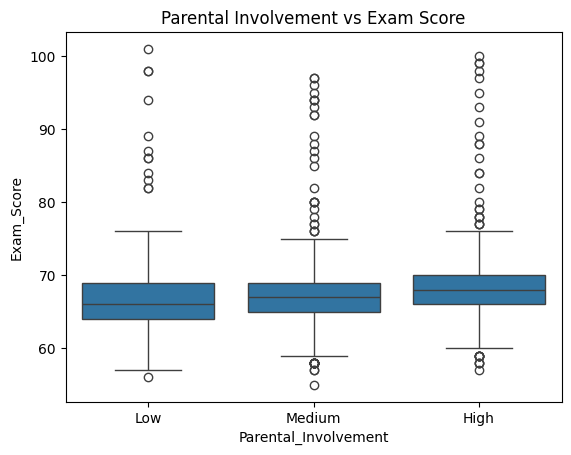

In [11]:
sns.boxplot(x='Parental_Involvement',y='Exam_Score', data=df)
plt.title('Parental Involvement vs Exam Score')
plt.show()

Para el siguiente gráfico se estudia las variables de ingreso familiar y puntuación final del examen, de acuerdo al gráfico que se presenta en la figura siguiente no se presentan evidencias de que haya un mejor desempeño en la puntuación final del examen y el nivel de ingreso de los padres.

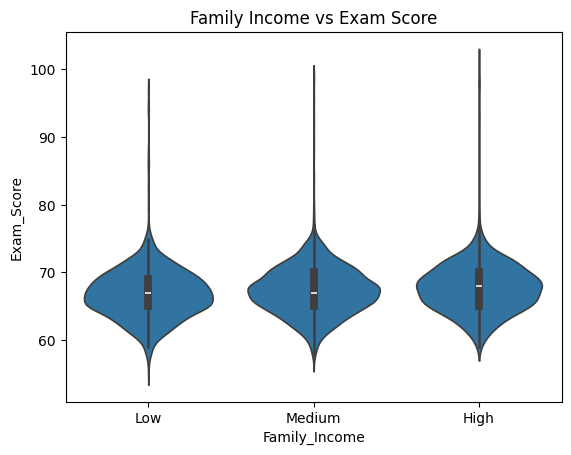

In [12]:
sns.violinplot(x='Family_Income', y='Exam_Score', data=df)
plt.title('Family Income vs Exam Score')
plt.show()

 En la figura siguiente se gráfica el género de lo estudiantes y el puntaje final de examen se puede identificar que no se presenta una diferencia entre el género y la puntuación final del examen. 

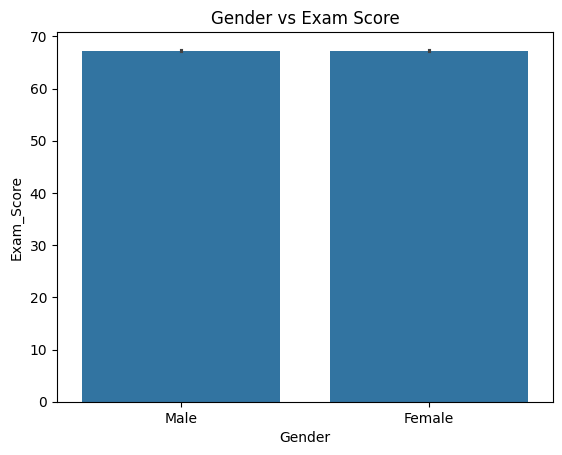

In [13]:
sns.barplot(x='Gender', y='Exam_Score', data =df)
plt.title('Gender vs Exam Score')
plt.show()

 En la siguiente figura se verifica la categorias de nivel educativo alcanzado por los padres en tre categorias y la puntuación del examen final, es de esta manera que no se presentan diferencias entre los diferentes niveles de eduación alcanzado por los padres y la puntuación final del examen de los estudiantes.A su vez se presentan valores extremos para las tres categorias de nviel educativo alcanzado por los padres y la puntuación final del examen de los estudiantes.

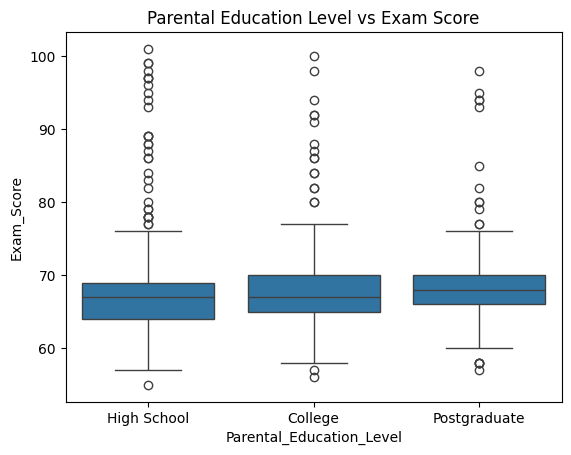

In [14]:
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=df)
plt.title('Parental Education Level vs Exam Score')
plt.show()

En la siguiente figura se presenta la relación entre el número de horas de suenño y la puntuación final del examen, se podria identificar que se presentan mejores resultados para los estudiantes que contestaron dormir siete horas. SIn embargo, no se presentan una relación clara entre las diferentes puntuaciones del puntaje del examen.

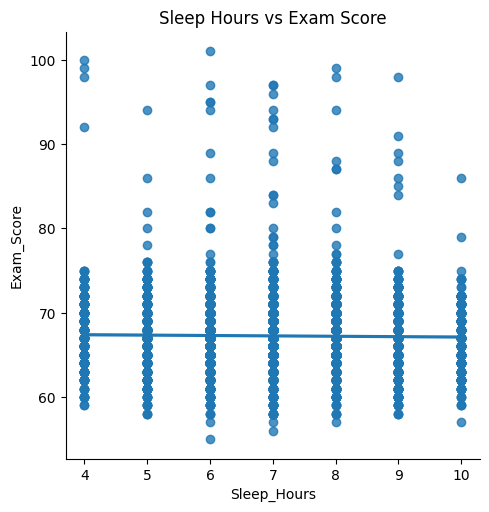

In [15]:
sns.lmplot(x='Sleep_Hours', y='Exam_Score', data=df)
plt.title('Sleep Hours vs Exam Score')
plt.show()

Por ultimo, se presenta la relación entre el puntaje del examen y la influencia de sus compañeros, en este apartado podemos identificar que no se presntan diferencias en promedio entre las diferentes categorias de influencia de sus compañeros y la puntación del examen final.

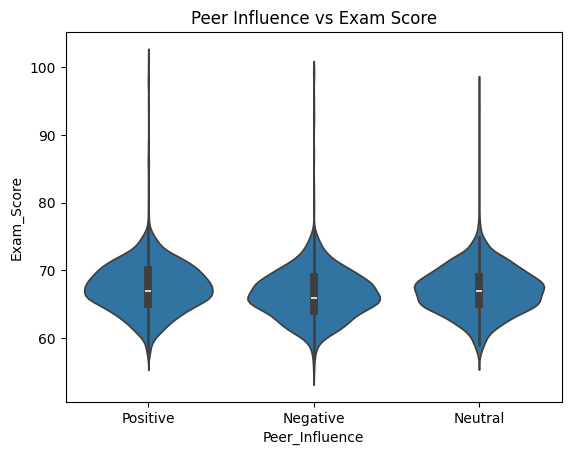

In [16]:
sns.violinplot(x='Peer_Influence', y='Exam_Score', data=df)
plt.title('Peer Influence vs Exam Score')
plt.show()

Por ultimo se presenta una matriz de correlaciones entre las diferentes variables y de acuerdo a la matriz no se reportan correlaciones altas entre las variables. A su vez, las dos variables que presentan correlaciones marginalmente altas son las variables de horas de estudio y asistencia con el puntaje del examen. Por ultimo las otras variables presentan correlaciones muy bajas menores 0.1 

/tmp/ipykernel_34516/3162937933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
/tmp/ipykernel_34516/3162937933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
/tmp/ipykernel_34516/3162937933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

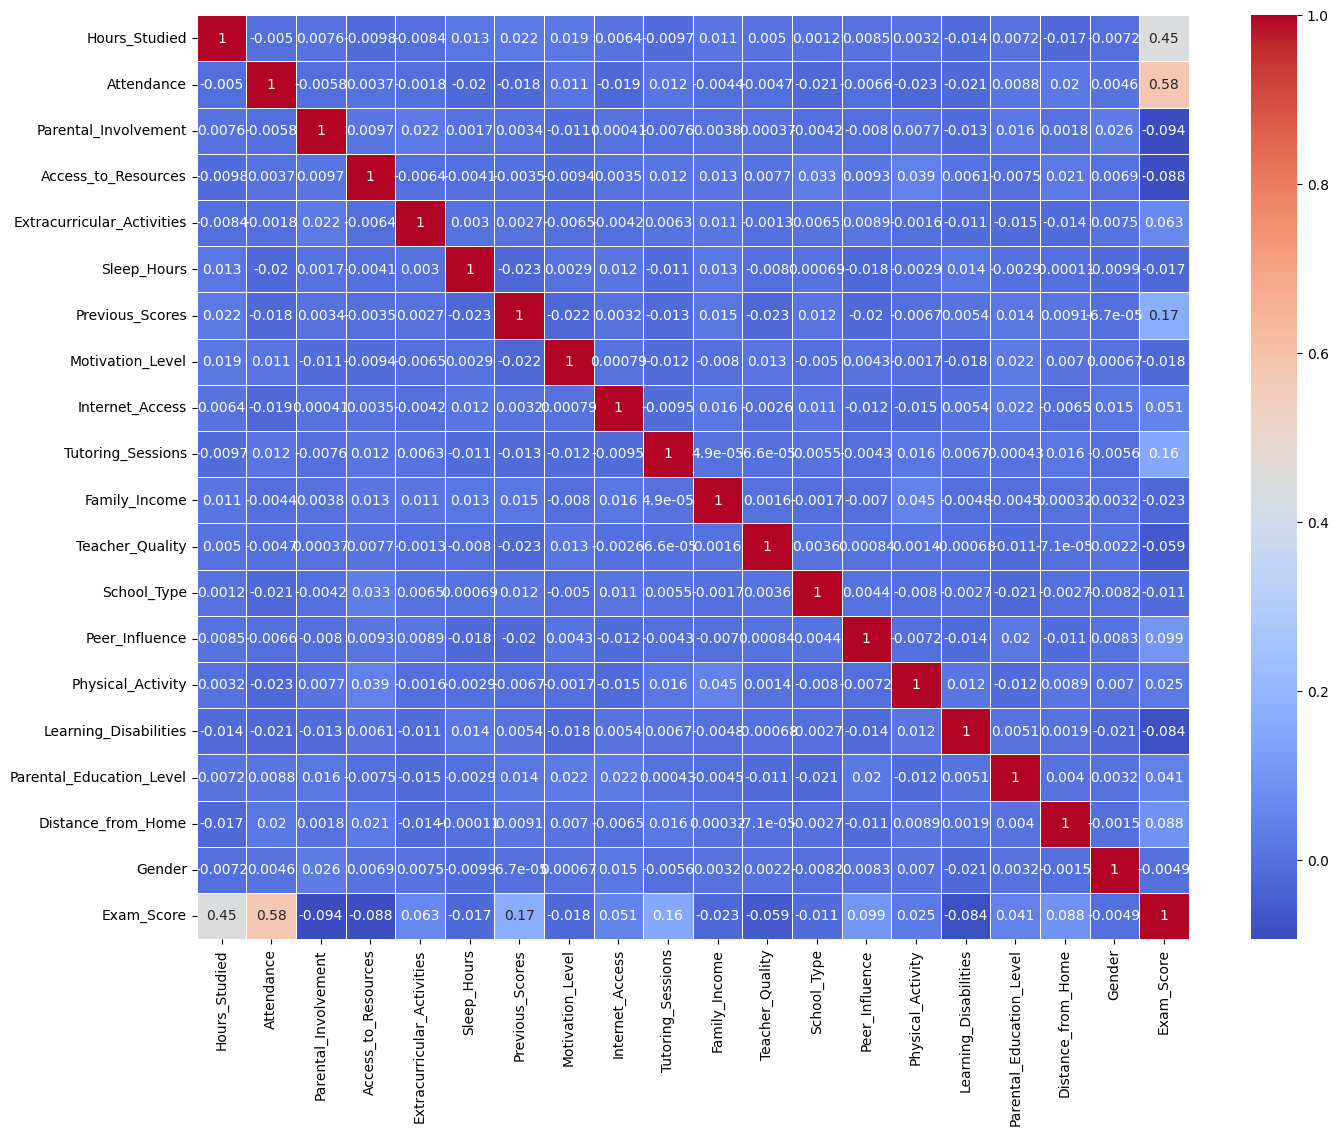

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                       'Parental_Education_Level', 'Distance_from_Home', 'Gender']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Limpieza de datos

En este apartado se seleccionan las variables que son numéricas para proceder a aplicar métodos de reducción de dimensionalidad. Asi tambien, se categoriza la variable de puntuación del examen en tres categorias, las cuales sonbajo para menor a 70, medio para menor a 80 y alto para puntajes mayor a 80. 

In [18]:
df['categoria'] = np.where(df['Exam_Score'] <= 70, 'bajo',
                           np.where(df['Exam_Score'] <= 80, 'medio', 'alto'))
df

/tmp/ipykernel_34516/26660025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categoria'] = np.where(df['Exam_Score'] <= 70, 'bajo',


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,categoria
0,23,84,1,0,0,7,73,1,1,0,...,2,1,2,3,0,1,2,1,67,bajo
1,19,64,1,2,0,8,59,1,1,2,...,2,1,0,4,0,0,1,0,61,bajo
2,24,98,2,2,1,7,91,2,1,2,...,2,1,1,4,0,2,2,1,74,medio
3,29,89,1,2,1,8,98,2,1,1,...,2,1,0,4,0,1,1,1,71,medio
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,4,0,0,2,0,70,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,...,2,1,2,2,0,1,2,0,68,bajo
6603,23,76,0,2,0,8,81,2,1,3,...,0,1,2,2,0,1,2,0,69,bajo
6604,20,90,2,1,1,6,65,1,1,3,...,2,1,0,2,0,2,2,0,68,bajo
6605,10,86,0,0,1,6,91,0,1,2,...,2,0,2,3,0,1,0,0,68,bajo


 Por ultimo se identifica el número de registros para cada categoria creada para el caso de categoria de puntaje del examen alto son 43 registros, para la categoria de medio se identifican 1012 registros y por ultimo para la categoria de puntuación bajo se presentan 5323 registros.

In [19]:
a = df.groupby('categoria')
a.count()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
categoria,,,,,,,,,,,,,,,,,,,,
alto,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
bajo,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323,5323
medio,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012


# Reducción de Dimensionalidad
En este apartado se aplican métodos de reducción de dimensionalidad se seleccionan las variables númericas para realizar la descomposición de valores singulares.

## Analisis de Componentes Principales

In [20]:
import pandas as pd
X = df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']]
y= df.categoria
y

0        bajo
1        bajo
2       medio
3       medio
4        bajo
        ...  
6602     bajo
6603     bajo
6604     bajo
6605     bajo
6606     bajo
Name: categoria, Length: 6378, dtype: object

In [21]:
from sklearn.preprocessing import StandardScaler # se cargan las librerias necesarias
X = StandardScaler().fit_transform(X) # se estandarizan los datos para obtener mejor desempeño de las técnicas de reducción de dimensionalidad

 En este apartado se calcula la matriz de covarianza. 

In [22]:
import numpy as np 

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00015681 -0.00499748  0.01312102  0.02249531 -0.00965511  0.00318375]
 [-0.00499748  1.00015681 -0.01960518 -0.01808569  0.01207228 -0.02298   ]
 [ 0.01312102 -0.01960518  1.00015681 -0.02324171 -0.01146732 -0.00289861]
 [ 0.02249531 -0.01808569 -0.02324171  1.00015681 -0.01315982 -0.00669492]
 [-0.00965511  0.01207228 -0.01146732 -0.01315982  1.00015681  0.01632786]
 [ 0.00318375 -0.02298    -0.00289861 -0.00669492  0.01632786  1.00015681]]


Se realizan las operaciones y se obtienen los valores y vectores singulares de la matriz de covarianza.

In [23]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.32988392 -0.14543401 -0.78895019 -0.48831486  0.09554212 -0.00185537]
 [ 0.47984844 -0.34194806 -0.41549293  0.52521281  0.38506691 -0.23676487]
 [ 0.50281281  0.27923237 -0.17179336 -0.2502704  -0.54683453 -0.52728771]
 [ 0.54888752  0.29792165  0.06716585 -0.46952818  0.51039955  0.35283073]
 [-0.02426369  0.64511533 -0.40821139  0.44644077 -0.18255294  0.42891259]
 [ 0.3259373  -0.52822217 -0.06528757 -0.0574348  -0.49973383  0.59787214]]

Eigenvalues 
[0.9461416  0.97152427 0.99373474 1.04308816 1.0268858  1.01956631]


In [24]:
u,s,v = np.linalg.svd(X.T)
u

array([[-0.48831486, -0.09554212, -0.00185537, -0.78895019,  0.14543401,
         0.32988392],
       [ 0.52521281, -0.38506691, -0.23676487, -0.41549293,  0.34194806,
        -0.47984844],
       [-0.2502704 ,  0.54683453, -0.52728771, -0.17179336, -0.27923237,
        -0.50281281],
       [-0.46952818, -0.51039955,  0.35283073,  0.06716585, -0.29792165,
        -0.54888752],
       [ 0.44644077,  0.18255294,  0.42891259, -0.40821139, -0.64511533,
         0.02426369],
       [-0.0574348 ,  0.49973383,  0.59787214, -0.06528757,  0.52822217,
        -0.3259373 ]])

 Por ultimo, se ordenan los eigenvalores en orden descendente que corresponden a los valores de los componentes principales.

In [25]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.0430881555835665
1.0268857974499537
1.0195663126402157
0.9937347442092098
0.9715242709915536
0.9461416004176276


En el siguiente apartado se calcula la varianza acumulada y la varianza explicada para los primeros dos componentes principales que poseen la mayor cantidad de varianza explicada.
Para este caso los componentes explican un total de 17 + 34 = 51% de información recuperada a traves de la reducción de dimensionalidad.

In [26]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 17.38207685,  34.49415673,  51.48426433,  68.04391329,
        84.23344574, 100.        ])

In [27]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.48831486  0.09554212]
 [ 0.52521281  0.38506691]
 [-0.2502704  -0.54683453]
 [-0.46952818  0.51039955]
 [ 0.44644077 -0.18255294]
 [-0.0574348  -0.49973383]]


In [28]:
Y = X.dot(matrix_w)
Y

array([[-0.5349027 ,  0.32868398],
       [-0.16419248, -2.05235697],
       [ 0.10100726,  0.66781288],
       ...,
       [ 1.55533936,  0.61165983],
       [ 0.92389984,  0.90249344],
       [-1.73681139, -0.85219924]])

In [29]:
#from matplotlib import style;
#print(plt.style.available);

En el siguiente gráfico se presenta el gráfico de reducción de dimensionalidad via PCA sin embargo se identífica que no se para bien las diferentes categorias de los puntajes de los estudiantes. Los puntos rojos indican la categoria baja, los azules indican el puntaje medio y los verdes indican los puntajes altos. Sin embargo el analisis de componentes princiapales no presenta resultados satisfactorios. 

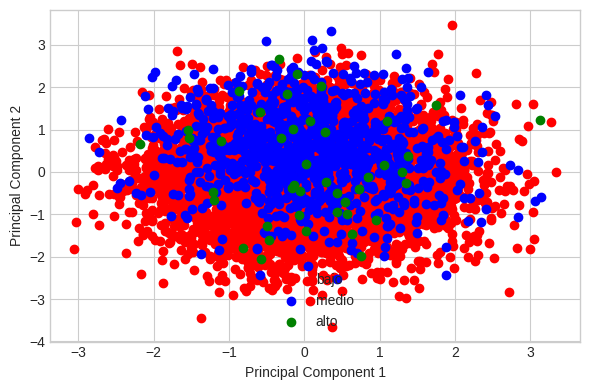

In [30]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('bajo','medio','alto'), ('red', 'blue','green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# Analisis Discriminante Lineal

En el siguiente apartado se realiza el analisis de discriminante lineal 

In [31]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP


2024-09-24 21:55:38.980658: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 21:55:38.989920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 21:55:39.002952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 21:55:39.006377: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 21:55:39.015170: I tensorflow/core/platform/cpu_feature_guar

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


X = df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity']]
y= df.categoria
y
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


In [33]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Para los resultados del analisis de discriminante lineal se obtiene una mejor separación entre las dos primeras clases sin embargo para la tercera clase que es la que tiene menos registros no se obtiene una diferenciación clara.

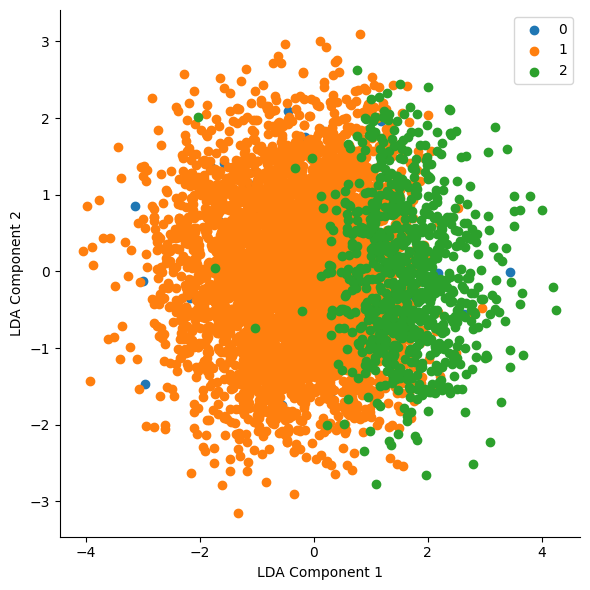

In [35]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['categoria']=y_train

sns.FacetGrid(tmp_Df, hue ="categoria",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')


# T-SNE

 Posteriormente se aplico el algoritmo T-Sne, sin embargo tampoco presenta muy buen desempeño al identificar las clases. 

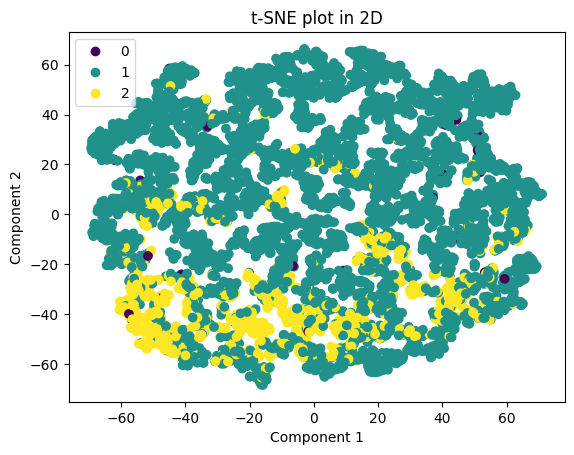

In [36]:
X_TSNE = TSNE(n_components=2).fit_transform(X)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

# UMAP 

Por ultimo para el metodo UMAP diferencia dos clases de manera mas eficiente que el analisis de discriminante lineal, sin embargo para la tercera clase no logra diferenciarlo de manera consistente.

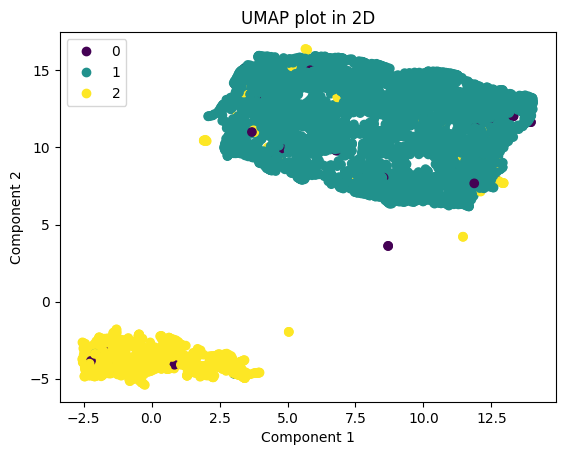

In [37]:
X_UMAP = UMAP(n_components=2).fit_transform(X, y)

scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y)
plt.title('UMAP plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

# Selección de caracteristicas

 En este apartado desarrollamos métodos de selección de caracteristicas, primero excluimos del analisis la variable de respuesta. 

In [38]:
df = df.drop ('Exam_Score', axis = 1)

In [39]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
y

0        bajo
1        bajo
2       medio
3       medio
4        bajo
        ...  
6602     bajo
6603     bajo
6604     bajo
6605     bajo
6606     bajo
Name: categoria, Length: 6378, dtype: object

In [40]:
# if necessary
replace_dict = {'bajo': '0', 'medio': '1', 'alto':'2'}
y2 = y.replace(replace_dict)

df2 = df.replace(replace_dict)
print(df2.head())

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 1   
1                           0            8               59                 1   
2                           1            7               91                 2   
3                           1            8               98                 2   
4                           1            6               65                 2   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_

## Info Gain

En este apartado se aplica el método de ganancia de información que se basa en métodos no paramétricos basados en la estimación de a entropia. 

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

Para la técnica de ganancia de información las variables que obtienen un mayor puntaje son la asistencia y las horas de estudio, seguido del acceso a recursos educativos. Por otro lado, las variables que obtienen un valor muy cercano a cero fuerón género, distancia a la escuela, discapacidades de aprendizaje y actividad física.

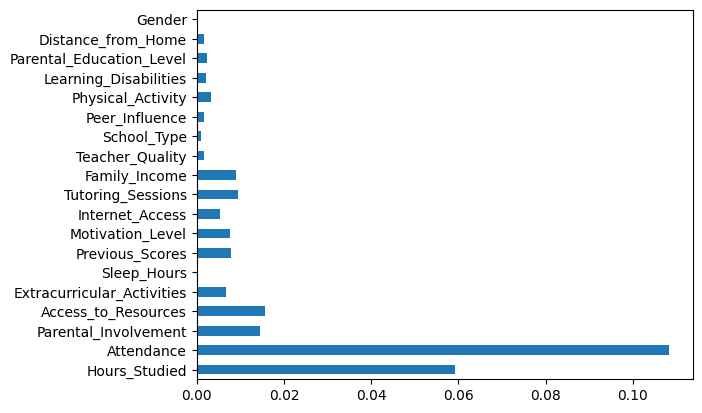

Execution time: 0.35 seconds


In [42]:
from sklearn.feature_selection import mutual_info_classif

# start time
start_time_forward = time.time()

### Applying feature selection method
X_new = mutual_info_classif(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# plot feature selection
feat_imp = pd.Series(X_new, df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

## Umbral de baja varianza

 Este método elimina todas aquellas variables que no cumplen con un umbral de varianza, para nuestro conjunto de datos, seleccionamos un treshold de 5 el cual es bastante alto retomando la tabla del analisis descriptivo mostrado anteriormente donde la mayoria de nuestras variables tienen desviaciones estandar menores a 3 en la mayoria de los casos. 

Seleccionando ese treshold se obtuvierón las siguientes variables horas de estudio, asistencia, horas de sueño y puntuación previa como variables reelevantes que podrian estar influyendo en el resultado de la puntuación final del examen.

In [43]:
from sklearn.feature_selection import VarianceThreshold

# start time
start_time_forward = time.time()

### Applying feature selection method
sel = VarianceThreshold(threshold=2)
sel.fit_transform(X)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = sel.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores']
Execution time: 0.01 seconds


## Selección de caracteristicas univariada 

Este método selecciona las mejores características en función de pruebas estadisticas univariadas. Para nuestro conjunto de datos se selecciono un treshold de 3 y se obtuvierón las variables de horas de estudio, asistencia a clase y puntuación previa de pruebas anteriores comp principales que influyen en la puntuación final en el examen. 

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

# start time
start_time_forward = time.time()

### Applying feature selection method
select_kbest = SelectKBest(score_func=f_classif, k=3)  # change k
select_kbest.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = select_kbest.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")


The selected features are: ['Hours_Studied', 'Attendance', 'Previous_Scores']
Execution time: 0.01 seconds


### Prueba Chi X²

Para esta técnica se obtuvieron las varianles de horas de estudio, asistencia, acceso a recursos, puntuaciones previas y sesiones de tutoria con un treshod fijado en k =5.

In [45]:
from sklearn.feature_selection import SelectKBest, chi2

# start time
start_time_forward = time.time()

### Applying feature selection method
chi2_selector = SelectKBest(score_func=chi2, k=5)  # change k
chi2_selector.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = chi2_selector.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")


The selected features are: ['Hours_Studied', 'Attendance', 'Access_to_Resources', 'Previous_Scores', 'Tutoring_Sessions']
Execution time: 0.02 seconds


# Coeficiente de correlación
Para el caso del coeficiente de correlación se omitio presentar la matriz ya que no se visibilizaba de manera clara las puntuaciones debido al exceso de variables. Sin embargo se presenta de forma descendente las correlaciones mas altas entre las variables las cuales son asistencia, horas de estudio, puntuación previa y sesiones de tutoria con correlaciones mayores a .10

In [46]:
# start time
start_time_forward = time.time()

### Applying feature selection method
correlation_matrix = df2.corr()
corr_with_target = correlation_matrix["categoria"].drop("categoria")

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# Sort and show features by absolute correlation value
sorted_corr = corr_with_target.abs().sort_values(ascending=False)
print(f"Absolute Correlations with the Objective (Outcome):\n{sorted_corr}")

# Define a threshold for correlation (e.g., keep features with |correlation| > 0.2)
threshold = 0.2
selected_features_corr = sorted_corr[sorted_corr > threshold].index.tolist()
print(f"Selected features are: {selected_features_corr}")

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")


Absolute Correlations with the Objective (Outcome):
Attendance                    0.391888
Hours_Studied                 0.325076
Previous_Scores               0.136005
Tutoring_Sessions             0.114585
Access_to_Resources           0.090930
Peer_Influence                0.081066
Parental_Involvement          0.077366
Distance_from_Home            0.064029
Extracurricular_Activities    0.047430
Teacher_Quality               0.043596
Internet_Access               0.042674
Learning_Disabilities         0.038890
Parental_Education_Level      0.030187
Motivation_Level              0.024038
School_Type                   0.020983
Physical_Activity             0.018889
Family_Income                 0.016573
Sleep_Hours                   0.004703
Gender                        0.002488
Name: categoria, dtype: float64
Selected features are: ['Attendance', 'Hours_Studied']
Execution time: 0.01 seconds


# Forward Selección

Los resultados de este método obtuvierón las variables de 'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Previous_Scores', 'Internet_Access', 'Tutoring_Sessions', 'Peer_Influence', 'Distance_from_Home'

In [47]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [48]:
# start time
start_time_forward = time.time()

### Applying feature selection method
ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward')
ffs.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = ffs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Previous_Scores', 'Internet_Access', 'Tutoring_Sessions', 'Peer_Influence', 'Distance_from_Home']
Execution time: 1.62 seconds


# Backward Selección
Para este método las variables seleccionadas fueron las de 'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Previous_Scores', 'Internet_Access', 'Tutoring_Sessions', 'Peer_Influence', 'Distance_from_Home'

In [49]:
# start time
start_time_forward = time.time()

### Applying feature selection method
bfs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward')
bfs.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = bfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")


The selected features are: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Previous_Scores', 'Internet_Access', 'Tutoring_Sessions', 'Peer_Influence', 'Distance_from_Home']
Execution time: 18.97 seconds


# Embedded Métodos 
## Lasso Regularizado 
 Para el método de lasso regularizado con untreshold de 0.1 se obtuvieron con mayor puntuación las variables de horas de estudio, puntuación previa y asistencia. A su vez las demas variables consideradas obtuvierón puntuaciones cercanas a cero.

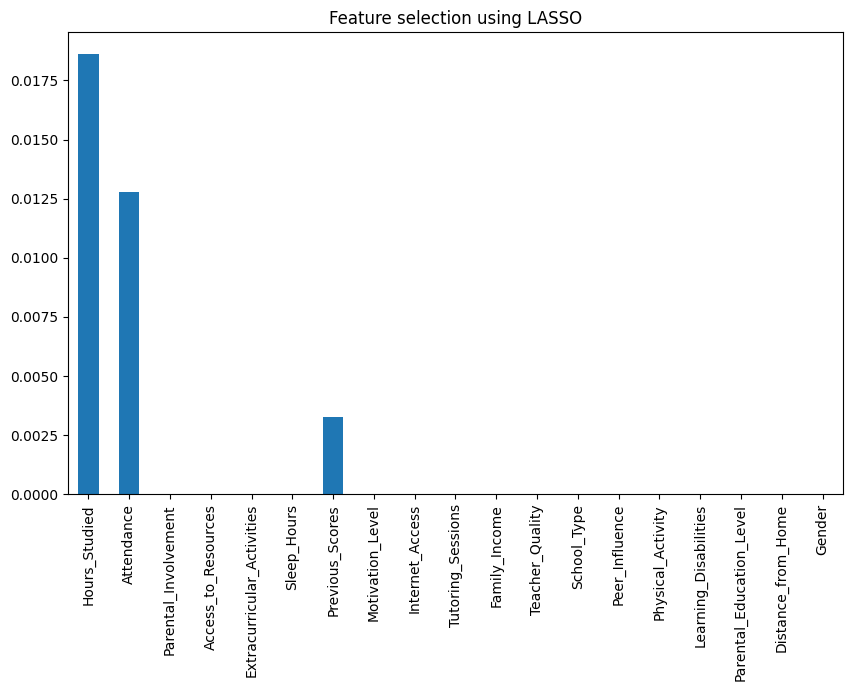

Execution time: 0.01 seconds


In [50]:
from sklearn.linear_model import Lasso

# start time
start_time_forward = time.time()

### Applying feature selection method
lasso = Lasso(alpha=0.1)  # adjust alpha
lasso.fit(X, y2)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
lasso_coef.plot(kind='bar')
plt.title('Feature selection using LASSO')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

# Arboles aleatorios
 Por ultimo, se áplico el método de árboles aleatorios y las variables que obtuvierón un mayor puntaje fuerón las de asistencia, puntuación previa y horas de estudio.

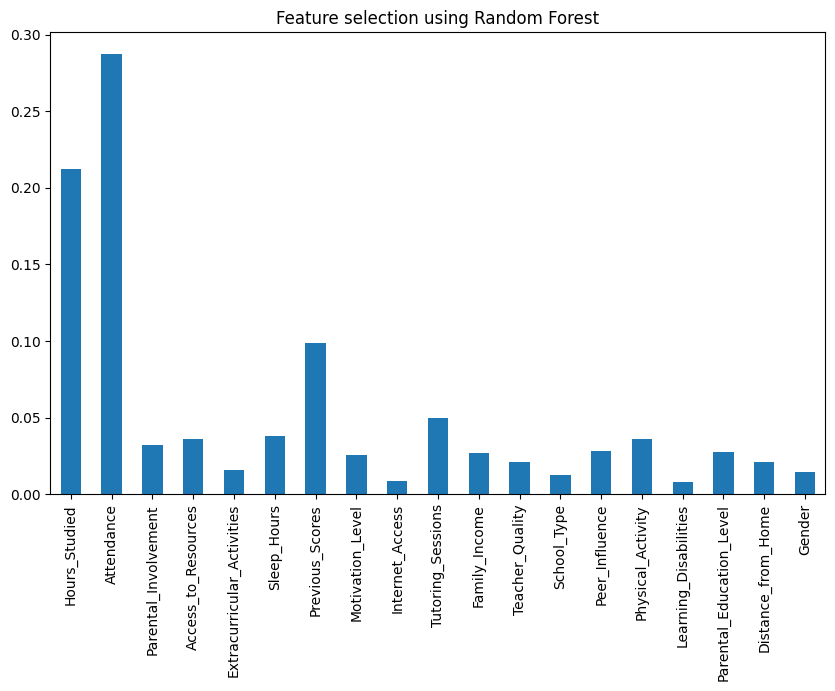

Execution time: 0.01 seconds


In [51]:
from sklearn.ensemble import RandomForestClassifier

# start time
start_time_forward = time.time()

### Applying feature selection method
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# show feature selection
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature selection using Random Forest')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

# Conclusiones 
De acuerdo a los resultados presentados anteriormente se puede concluir que el método de reducción de dimensionalidad que obutvo el mejor desemepeño fue el discriminante líneal, asi como el UMAP. SIn embargo dichos métodos tienen desempeño deficiente para la identificación de la clase con menores registros. 
Por otro lado se aplicarón varios métodos de selección de caracteristicas y en la mayoria las variables que predominarón fueron la asistencia, el número de horas de estudio y las puntuaciones en los examenes previos. A su vez las demas variables no presentaban un aporte reelevante en la influencia en el desempeño de los estudiantes en el examen final.
Estos resultados son utiles ya que proveen información util para las entidades educativas para mejorar el desempeño y calidad del aprendizaje asi como para establecer iniciativas que ayuden en el desarrollo academico de sus estudiantes.